### ANN implementation

 ANN --- artificial neural network
 
 1) ANN practical implementation
 
 2) early stopping
 
 3) black box models vs white box models
 
 4) CNN *introduction*

In [1]:
# !pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


## import some basics libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
## divide the dataset into independent and dependent features

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


### Feature engineering

In [8]:
# if we remove first, and other columns are 0 => it was the first column. In other situation we don't need the first columns anyways
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [9]:
## drop one hot encoded columns
X = X.drop(['Geography', 'Gender'], axis=1)

In [10]:
## concatenate these variables with dataframe
X = pd.concat([X, geography, gender], axis=1)

In [11]:
# splitting the dataset into Training Set and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Which algorithms feature scaling is required?

1) ANN (+)

2) Logistic regression (+)

3) Linear regression (+)

4) Decisiion tree (-)

5) Random Forest (-)

6) XGB (-)

7) KNN (+)

8) K means (+)

1) distance based 

2) gradient descent. 

Basically anything that require scaling

In [12]:
## feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_train.shape

(8000, 11)

## Part 2
now let's create ANN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense     # related to activation
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU # activation
from tensorflow.keras.layers import Dropout   # optimization? algorithm for training

In [34]:
### lets initialize the ANN
classifier = Sequential()

In [35]:
# Adding the input layer
classifier.add(Dense(   units=11, activation='relu')) # relu will apply on the next layer

In [36]:
# adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))
# adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [37]:
# adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [38]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
# by default adam uses 0.001

In [39]:
# chaning learning rate manually
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [40]:
## early stopping. if our model stops training, when accuracy doesn't improve. we have to use early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [41]:
# lets train our model
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.5964 - accuracy: 0.7040 - val_loss: 0.4727 - val_accuracy: 0.7944
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4834 - accuracy: 0.7959 - val_loss: 0.4520 - val_accuracy: 0.7940
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4696 - accuracy: 0.8009 - val_loss: 0.4408 - val_accuracy: 0.8016
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4519 - accuracy: 0.8084 - val_loss: 0.4295 - val_accuracy: 0.8092
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4359 - accuracy: 0.8099 - val_loss: 0.4175 - val_accuracy: 0.8179
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4206 - accuracy: 0.8240 - val_loss: 0.4066 - val_accuracy: 0.8232
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4196 - accuracy: 0.8220 - val_loss: 0.3991 - val_accuracy:

In [42]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

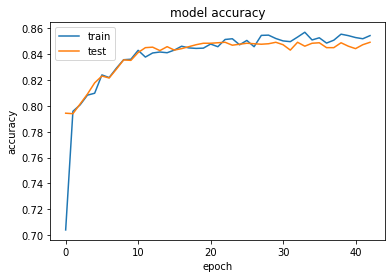

In [43]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


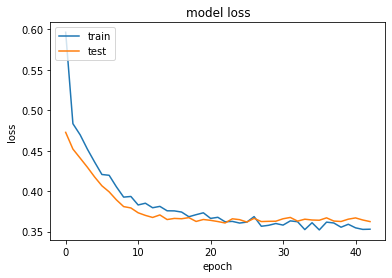

In [44]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

## Part 3 --- Making the predictions and evaluating the model

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [46]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1549,   46],
       [ 225,  180]])

In [47]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [48]:
score

0.8645

In [49]:
# get the weights
classifier.get_weights()

[array([[-0.07598943, -0.45734885, -0.32082576,  0.04789588, -0.05232718,
          0.40946808, -0.05514829,  0.04904751,  0.12724136,  0.0166878 ,
         -0.16422053],
        [ 0.13738155, -0.4574191 , -0.04460588,  0.37393457,  0.33390614,
         -0.1841658 , -0.66535395,  0.3011841 ,  0.06070476, -0.8586075 ,
          0.7557755 ],
        [ 0.08417949, -0.4085335 ,  0.3416402 , -0.12164255, -0.1436808 ,
          0.23642309, -0.08050524,  0.04141728,  0.20606992, -0.00449654,
          0.30026343],
        [-0.6361413 ,  0.5313561 ,  0.03299818,  0.314884  ,  0.48780444,
          0.06516276,  0.49418807,  0.68081236, -0.22846133, -0.25091198,
         -0.08556469],
        [-1.0239061 ,  0.21802714,  0.10396487, -1.075892  ,  0.7685529 ,
         -0.05003236,  0.03604283,  0.26278028,  0.9671945 ,  0.04987314,
         -0.23036341],
        [-0.11856383, -0.13174763,  0.08688763, -0.09676328, -0.03029739,
         -0.20854272, -0.1154281 , -0.19179145, -0.1071049 , -0.3227494